# Mel Schwan, Stuart Miller, Justin Howard, Paul Adams
# Lab One: Visualization and Data Preprocessing

### MiniLab1 Project Requirments -
1. [Business understanding](#Businessunderstanding)
    1. [Describe the purpose of the data set you selected](#Assessthecurrentsituation)
    2. [Describe how you would define and measure the outcomes from the dataset](#CostBenefit)
    3. [How would you measure the effectiveness of a good prediction algorithm](#Desiredoutputs)
  
2. [Data Understanding](#Dataunderstanding)
    1. [Describe the meaning and type of data for each attribute in the data file](#Describedata)
    2. [Verify data quality: Explain any missing values, duplicate data, and outliers](#Datareport)
    3. [Give simple, appropriate statistics (range, mode, mean, median, variance, counts, etc.) for the most important attributes and describe what they mean](#Stats)
    4. [Visualize the most important attributes appropriately (at least 5 attributes)](#Distributions)
    5. [Explore relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate](#Correlations)
    6. [Identify and explain interesting relationships between features and the class you are trying to predict](#relationships)
    7. [Are there other features that could be added to the data or created from existing features? Which ones?](#Featurecreation)
    8. [Outlier Removal](#OutlierRemoval)
3. [Additional Work Accompanying Exploratory Data Analysis](#AdditionalWork)
    1. [Random Forest for Feature Importance using Gini Index](#randomforestgini)
    2. [Principal Components Analysis](#princomp)

Our project will follow a hybrid methodology, mixing the expectations of the grading rubric with the CRISP_DM framework. CRISP-DM stands for the cross-industry process for data mining, which provides a structured approach to planning a data mining project. It is a robust and well-proven methodology.

For Lab One, we will use the first two portions of this methodology. We will start by focusing on understanding the objectives and requirements from a business perspective, and then using this knowledge to define the data problem and project plan. Next, we will identify data quality issues, discover initial insights, or detect exciting nuggets of information that might allow for a hypothesis for analysis.

In future labs, we will execute a majority of the CRISP-DM steps.

<img src="./crisps-dm.png" style="width:550px;height:450px"/>


# 1. Stage One - Determine Business Objectives and Assess the Situation  <a class="anchor" id="Businessunderstanding"></a>
We will use the Home Credit Default Risk dataset made available on Kaggle to develop a useful model that predicts loan defaults for a majority of the loan applicants whose population is defined by the given training and test datasets. Predicting loan defaults is essential to the profitability of banks and, given the competitive nature of the loan market, a bank that collects the right data can offer and service more loans. This analysis of Home Credit's Default Risk dataset will focus on generating accurate loan default risk probabilities, identifying sub-populations among the given applicants, and finally, the most critical factors that indicate that an applicant will likely default on their loan.

## 1.1 Assess the Current Situation (Q1A)<a class="anchor" id="Assessthecurrentsituation"></a>

Home Credit is an international non-bank financial institution that operates in 10 countries and focuses on lending to people with little or no credit history. This institution has served 11 million customers, is based in the Czechia, and is a significant consumer lender in most of the Commonwealth of Independent States Countries, especially Russia. Recently, it has established a presence in China and the United States. The dataset provided is extensive, representing 307,511 applications from various locations. 

The data types vary in scale and type, from time-series credit histories to demographic indicators. Our analysis will focus on two datasets, data collected in the application train and test datasets, and several engineered features gathered from the millions of credit bureau records for each loan applicant.

### 1.1.1. Inventory of resources <a class="anchor" id="Inventory"></a>
List the resources available to the project including:
- Personnel:
  - Mel Schwan
  - Stuart Miller
  - Justin Howard
  - Paul Adams
- Data:
  -  307,511 individual loans
  -  application_{train|test}.csv
  -  bureau.csv
  -  bureau_balance.csv
  -  POS_CASH_balance.csv
  -  credit_card_balance.csv
  -  previous_application.csv
  -  installments_payments.csv
  -  HomeCredit_columns_description.csv 
- Computing resources:
  -  Four personnel computers
- Software:
  -  Jupyter Notebook
  -  Library Packages
    -  Pandas
    -  Pandas_profile
    -  Seaborn
    -  Numpy
    -  Mathplotlib
    -  Tables
    -  Cleaning (custom package)
    -  Sklearn


### 1.1.2. Requirements - <a class="anchor" id="Requirements"></a> 
-  Requirements
  -  Perform a descriptive analysis of a data set: exploring the statistical summaries of the features, visualizing important relationships among the attributes, and making conclusions from the visualizations and analysis. The analytical framework we will follow is a combination of the CRISP-DM framework and the specific requirements laid out within the Machine Learning Lab 1: Visualization.
  -  Demonstrate the team's understanding of Home Credits Business and the data model to best predict default on loans.
  
- Constraints
  -  Time : We are given three weeks to explore and visualize the data. 
  -  Data : The complete dataset contains several million records organized across eight datasets. We will focus our efforts on the given training set, test set, and aggregate features from the credit bureau dataset due to time constraints. 




### 1.1.3.Risks and contingencies <a class="anchor" id="Risks"></a>
  -  Outlier assumptions : Outliers will exist in multiple dimensions, we will develop a generalized predictive model that can account for a majority of Home Credit's core base of lower income loan applicants.
  
  -  Missing data assumptions : A large volume of data will be missing as Home Credit services customers with little credit history.
      - All missing values from the bureau dataset are assumed to equal zero, because Home Credit caters to consumers with little to no credit history. 
      - Due to the risk involved with imputing median values for credit-realted features, missing values will be assumed to be zero. All other missing values will be imputed depending on data type of the feature in question.
      - Imputation of data may result in false interpetation of the real data values
      
  -  Joined dataset assumptions : We are assuming that the primary key, SK_ID_CURR will reliably connect data from the the application dataset to the bureau dataset.

  - Elimintation of features : Features with a missing value percentage greater than or equal to 60% will be eliminated from consideration.
       - Elimintation of features can eliminate key factors in predicting loan defaults.

### 1.1.4.Terminology <a class="anchor" id="Terminology"></a>
Subject Matter Terminology:
- Default Status : The current status of the loan account in the context of on-time payments. An account reaches default status when the creditor recieves no payment for 270 days.
- Cash Loan : A one-time cash payment made by the creditor on behalf of the applicant for a durable good.
- Assets - Valuable resources owned by a business, which were acquired at a measurable money cost.
- Bad debt - Debts that are not collectible and therefore, proves to be of no worth to the creditor. 
- Bridge Loan - Refers to short-term loan to fund temporary needs as long as permanent financing is not available.
- Capitalization Rate - A rate of interest (discount) employed to calculate the present value of future cash flows. This is the rate that investors expect.
- Credit Analysis - The process of determining whether an applicant satisfies the credit standards of a firm and the amount of credit that should be extended to him.
- Debt Service Coverage Ratio - Ratio of total cash operating funds available to service debt obligations.
- Default Risk - Uncertainty of expected returns from a security attributable to possible changes in the financial capacity of the issuer to make future payments to the security owner.
- Delinquent - A situation where one fails to make payment, which can lead to foreclosure.
- Line of Credit - A bank agreement stating a company may borrow at any time up to the specified limit.
- Net Working Capital/Net Worth - The excess of current assets over current liabilities.Negotiable 
  - Certificates of Deposits
  - It is a marketable receipt of funds deposited in a bank for a fixed period. 
  - Off-Balance Sheet Financing
  - Hidden form of debt without being shown as a liability.
- Principal - An amount of money upon which interest is calculated.
- Roll Over - A situation where parties to the contract agree to carry over the loan for another stated period at the time of maturity.
- Security - Any thing offered or given to fulfill the performance of a contract. For example, real estate, stocks, fixed assets, jewelry, etc.
- Term - The tenure of the policy.
- Working capital - Current Assets plus Current Liabilities.
- Write off - To consider as a loss or failure in case of uncollectible investments.

Data Mining Terminology:
- Correlation : Assessments of correlation will be made using Pearson's R correlation coefficients.
- Multicollinearity : Features that appear to co-vary and have a Pearson's R correlation coefficient close to 1. 


### 1.1.5.Costs and benefits (Q1B) <a class="anchor" id="CostBenefit"></a>
- Cost
    -  Home Credit seeks to service those who struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders. Home Credit's customer base consists of high-risk applicants, but the lender seeks to provide this high-need population with a trustworthy source of much-needed credit. Home Credit aims to find the right balance between risk and rewards in an inherently risky applicant pool.

- Benefits
  -  Home Credit is broadening financial inclusion, extending credit to unbanked populations, while providing a positive and safe borrowing experience. Identifying the characteristics that inevitably lead to positive and negative loan experiences to customers without an established repayment history requires the use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities. Each customer that Home Credit identifies gains otherwise rare opportunity, while Home Credit gains the capital that other potential customers will use for their pursuits.

 ## 1.2 What are the desired outputs of the project? (Q1C) <a class="anchor" id="Desiredoutputs"></a>


**Business success criteria**
- Produce a model capable of predicting a loan's status with an accuracy greater than 80%.
- Build model capable of predicting whether an applicant will default with a precision greater than 60%.
- Reduce default rates to 10 precent

**Data mining success criteria**
- Build a data model that has a ROC value of .80 - .90    
- Define successful customers
    - Identify sub-populations who are most likely to successfully repay their loans.
    - Identify the most common financial characteristics of applicants who repay their loans.
    
- Define unsuccessful customers (defaults)
    - Identify the characteristics of applicants at risk of defaulting on their loans.
    - Identify the warning signs that precede default status.

 ## 1.3 What Questions Are We Trying To Answer? <a class="anchor" id="QA"></a>

Our analytic goal is to use the Home Credit data to train a model to generate an accurate probability of a client whether a potential client is capable of repayment of the loan requested. The target variable of the analysis is the binary label, 'TARGET,' indicating whether the loan entered into default status or not. During this process, we will determine the features that are most influential in establishing this target variable.

# 2. Stage  Two - Data Understanding <a class="anchor" id="Dataunderstanding"></a>


## 2.1 Initial Data Report (Q2) <a class="anchor" id="Datareport"></a>
Our data comes from the [Kaggle Home Credit Default Risk](https://www.kaggle.com/c/home-credit-default-risk/overview) competition website. 

Our analysis features the use of several Python libraries, such as Pandas, in addition to a custom data cleaning script for both the `application` and `bureau` datasets. 

In [1]:
# Import Libraries Required.
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

# import custom code
from cleaning import read_clean_data, missing_values_table, load_bureau, create_newFeatures, merge_newFeatures, fill_occupation_type
from tables import count_values_table

# some defaults
pd_max_rows_default = 60

In [2]:
# load data 
# path =  './application_train.csv'
# note that XNA is a encoding for NA interpret as np.nan
df =  pd.read_csv('./application_train.csv',
                 na_values = ['XNA'])
#loading bureau dataset

bureau = pd.read_csv('./bureau.csv',
                    na_values = ['XNA'])

## 2.2 Describe Data (Q2A) <a class="anchor" id="Describedata"></a>

We will use two of the files from the total dataset.

* `application_train.csv`: Information provided with each loan application
* `bureau.csv`: Information regarding clients from the credit bureaus

The two data files can be joined on the loan id (`SK_ID_CURR`).

### Loan Application Features
There are 122 features and 307511 observations in `application_train.csv`.

In [3]:
df.shape

(307511, 122)


The following features are loan application attributes from `application_train.csv`.
Descriptions, types, and and units are given for each feature.
In the original dataset, there were a large number of features related to building features included with the loan applications.
However, these features could not be used due to the large number of missing values.

| Feature                      | Description | Type | Units |
|------------------------------|-------------|------|-------|
| SK_ID_CURR                   |  ID of loan in our sample | Category | N/A |
| TARGET                       |  Target Variable (1 - difficulty paying loan, 0 - all other cases) |  Category | N/A  |
| NAME_CONTRACT_TYPE           |  Identification if loan is cash or revolving |  Category | N/A  |
| CODE_GENDER                  |  Gender of the client (M - male, F - female) |  Category | N/A  |
| FLAG_OWN_CAR                 |  Flag if the client owns a car |  Category | N/A  |
| FLAG_OWN_REALTY              |  Flag if client owns a house or flat |  Category | N/A  |
| CNT_CHILDREN                 |  Number of children the client has |  Coninuous | N/A  |
| AMT_INCOME_TOTAL             |  Income of the client |  Coninuous | Currency  |
| AMT_CREDIT                   |  Credit amount of the loan |  Coninuous | Currency  |
| AMT_ANNUITY                  |  Loan annuity |  Coninuous | Currency  |
| AMT_GOODS_PRICE              |  For consumer loans it is the price of the goods for which the loan is given |  Coninuous | Currency  |
| NAME_TYPE_SUITE              |  Who was accompanying client when he was applying for the loan |  Category | N/A  |
| NAME_INCOME_TYPE             |  Clients income type (businessman, working, maternity leave) |  Category | N/A  |
| NAME_EDUCATION_TYPE          |  Level of highest education the client achieved |  Category | N/A  |
| NAME_FAMILY_STATUS           |  Family status of the client |  Category | N/A  |
| NAME_HOUSING_TYPE            |  What is the housing situation of the client (renting, living with parents, ...) |  Category | N/A  |
| REGION_POPULATION_RELATIVE   |  Normalized population of region where client lives (higher number means the client lives in more populated region) |  Coninuous | Days  |
| DAYS_BIRTH                   |  Client's age in days at the time of application |  Coninuous | Days  |
| DAYS_EMPLOYED                |  How many days before the application the person started current employment |  Coninuous | Days  |
| DAYS_REGISTRATION            |  How many days before the application did client change his registration |  Coninuous | Days  |
| DAYS_ID_PUBLISH              |  How many days before the application did client change the identity document with which he applied for the loan |  Coninuous | Days  |
| OWN_CAR_AGE                  |  Age of client's car |  Coninuous | Months  |
| FLAG_MOBIL                   |  Did client provide mobile phone (Y, N) |  Category | N/A  |
| FLAG_EMP_PHONE               |  Did client provide work phone (Y, N) |  Category | N/A  |
| FLAG_WORK_PHONE              |  Did client provide home phone (Y, N) |  Category | N/A  |
| FLAG_CONT_MOBILE             |  Was mobile phone reachable (Y, N) |  Category | N/A  |
| FLAG_PHONE                   |  Did client provide home phone (Y, N) |  Category | N/A  |
| FLAG_EMAIL                   |  Did client provide email (Y, N) |  Category | N/A  |
| CNT_FAM_MEMBERS              |  What kind of occupation does the client have |  Category | N/A  |
| OCCUPATION_TYPE              |  How many family members does client have |  Category | N/A  |
| REGION_RATING_CLIENT         |  Our rating of the region where client lives (1,2,3) |  Category | N/A  |
| REGION_RATING_CLIENT_W_CITY  |  Our rating of the region where client lives with taking city into account (1,2,3) |  Category | N/A  |
| WEEKDAY_APPR_PROCESS_START   |  On which day of the week did the client apply for the loan |  Category | N/A  |
| HOUR_APPR_PROCESS_START      |  Approximately at what hour did the client apply for the loan |  Category | N/A  |
| REG_REGION_NOT_LIVE_REGION   | Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)  |  Category | N/A  |
| REG_REGION_NOT_WORK_REGION   |  Flag if client's permanent address does not match work address (1=different, 0=same, at region level) |  Category | N/A  |
| LIVE_REGION_NOT_WORK_REGION  |  Flag if client's contact address does not match work address (1=different, 0=same, at region level) |  Category | N/A  |
| REG_CITY_NOT_LIVE_CITY       |  Flag if client's permanent address does not match contact address (1=different, 0=same, at city level) |  Category | N/A  |
| REG_CITY_NOT_WORK_CITY       |  Flag if client's permanent address does not match work address (1=different, 0=same, at city level) |  Category | N/A  |
| LIVE_CITY_NOT_WORK_CITY      |  Flag if client's contact address does not match work address (1=different, 0=same, at city level) |  Category | N/A  |
| ORGANIZATION_TYPE            | Type of organization where client works  |  Category | N/A  |
| EXT_SOURCE_1                 |  Normalized score from external data source |  Coninuous | N/A  |
| EXT_SOURCE_2                 | Normalized score from external data source  |  Coninuous | N/A  |
| EXT_SOURCE_3                 |  Normalized score from external data source |  Coninuous | N/A  |
| OBS_30_CNT_SOCIAL_CIRCLE     | How many observation of client's social surroundings with observable 30 DPD (days past due) default  |  Coninuous | N/A  |
| DEF_30_CNT_SOCIAL_CIRCLE     |  How many observation of client's social surroundings defaulted on 30 DPD (days past due)  |  Coninuous | N/A  |
| OBS_60_CNT_SOCIAL_CIRCLE     |  How many observation of client's social surroundings with observable 60 DPD (days past due) default |  Coninuous | N/A  |
| DEF_60_CNT_SOCIAL_CIRCLE     |  How many observation of client's social surroundings defaulted on 60 (days past due) DPD | Coninuous  | N/A  |
| DAYS_LAST_PHONE_CHANGE       |  How many days before application did client change phone | Coninuous  | N/A  |
| FLAG_DOCUMENT_2              | Did client provide document 2  |  Category | N/A  |
| FLAG_DOCUMENT_3              | Did client provide document 3  |  Category | N/A  |
| FLAG_DOCUMENT_4              | Did client provide document 4  |  Category | N/A  |
| FLAG_DOCUMENT_5              | Did client provide document 5  |  Category | N/A  |
| FLAG_DOCUMENT_6              | Did client provide document 6  |  Category | N/A  |
| FLAG_DOCUMENT_7              | Did client provide document 7  |  Category | N/A  |
| FLAG_DOCUMENT_8              | Did client provide document 8  |  Category | N/A  |
| FLAG_DOCUMENT_9              | Did client provide document 9  |  Category | N/A  |
| FLAG_DOCUMENT_10             | Did client provide document 10  |  Category | N/A  |
| FLAG_DOCUMENT_11             | Did client provide document 11  |  Category | N/A  |
| FLAG_DOCUMENT_12             | Did client provide document 12  | Category  | N/A  |
| FLAG_DOCUMENT_13             | Did client provide document 13  | Category  | N/A  |
| FLAG_DOCUMENT_14             | Did client provide document 14  | Category  | N/A  |
| FLAG_DOCUMENT_15             | Did client provide document 15  |  Category | N/A  |
| FLAG_DOCUMENT_16             | Did client provide document 16  |  Category | N/A  |
| FLAG_DOCUMENT_17             | Did client provide document 17  |  Category | N/A  |
| FLAG_DOCUMENT_18             | Did client provide document 18  |  Category | N/A  |
| FLAG_DOCUMENT_19             | Did client provide document 19  |  Category | N/A  |
| FLAG_DOCUMENT_20             | Did client provide document 20  |  Category | N/A  |
| FLAG_DOCUMENT_21             | Did client provide document 21  |  Category | N/A  |
| AMT_REQ_CREDIT_BUREAU_HOUR   | Number of enquiries to Credit Bureau about the client one hour before application | Category  | N/A  |
| AMT_REQ_CREDIT_BUREAU_DAY    | Number of enquiries to Credit Bureau about the client one day before application (excluding one hour before application)  | Category  | N/A  |
| AMT_REQ_CREDIT_BUREAU_WEEK   | Number of enquiries to Credit Bureau about the client one week before application (excluding one day before application)  |  Category | N/A  |
| AMT_REQ_CREDIT_BUREAU_MON    |  Number of enquiries to Credit Bureau about the client one month before application (excluding one week before application) |  Category | N/A  |
| AMT_REQ_CREDIT_BUREAU_QRT    | Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)  |  Category | N/A  |
| AMT_REQ_CREDIT_BUREAU_YEAR   |  Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application) |  Category | N/A  |

### Bureau Data Features

Features from the bureau data are not used directly; new features are engineered from these features.
Descriptions for the base features that are used in feature engineering are described here.
For details on the engineered features see section [2.5 Feature Engineering](#Featurecreation).

| Feature                      | Description | Type | Units |
|------------------------------|-------------|------|-------|
| SK_ID_CURR                   |  ID of loan in our sample | Category | N/A |
| CREDIT_ACTIVE                |  The statue of reported credits (Open or Close) | Category | N/A |
| CREDIT_DAY_OVERDUE           |  The number of days a given credit is over due | Continuous | Days |
| AMT_CREDIT_SUM               |  Current credit amount for the Credit Bureau credit | Continuous | Currency |
| AMT_CREDIT_SUM_DEBT          | Current debt on Credit Bureau credit | Continuous | Currency |
| AMT_CREDIT_SUM_LIMIT         | Current credit limit of credit card reported in Credit Bureau | Continuous | Currency |
| AMT_CREDIT_SUM_OVERDUE       | Current amount overdue on Credit Bureau credit | Continuous | Currency |

## 2.3 Verify Data Quality (Q2B) <a class="anchor" id="Verifydataquality"></a>

**Note**: All resolutions to the data quality issues described below are implemented in `cleaning.py`,
which is used to load the cleaned dataset.

After importing the data, incorrect datatypes were observed. Strings that were labeled as `object` datatypes and integer counts were more appropriately re-labeled as `category` types.

No data input errors or duplicated entries were detected.

### 2.3.1. Missing Data <a class="anchor" id="MissingData"></a>
In addition to incorrect datatypes, another common problem when dealing with real-world data is missing values. These can arise for many reasons and have to be either filled in or removed before we train a machine learning model. First, let’s get a sense of how many missing values are in each column. 

While we always want to be careful about removing information, if a column has a high percentage of missing values, then it probably will not be useful to our model. The threshold for removing columns should depend on the problem.

In [4]:
# create missing values table with all rows
pd.set_option('display.max_rows', 129)
missing_values_table(df)

Your selected dataframe has 122 columns.
There are 69 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_AVG,214865,69.9
COMMONAREA_MEDI,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_AVG,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_MODE,210199,68.4


In [5]:
# return row display setting to default
pd.set_option('display.max_rows', pd_max_rows_default)


Each feature or set of features will be discussed in descending order of the percentage of missing values it contains.

**Building Features with Missing Values**  
A large number of the features with values are normalized information about the build where the client lives (such as `ENTRANCES_MODE` or `COMMONAREA_AVG`).
It is plausible that only some of these features exist in a given client's building.
It is also plausible that some of the records are missing (not provided by the client). 
There does not appear to be an indication if values are missing or not applicable to the client.
All of these values have a missing rate above 40%.

**Missing values in `OWN_CAR_AGE`**  
This feature refers to the age of cars owned by the client.
Approximately 66.0% of the values are empty.
However, there is also a feature `FLAG_OWN_CAR,` which indicates that the client owns a car.
It is reasonable to expect that values will be missing if the client does not own a car.
For clients reporting owning a car, all but five car age values are present.
For clients reporting not owning a car, no car ages are reported.
Since the missing rate is minimal, these missing values could be imputed. Each feature or set of features will be discussed in descending order of the percentage of missing values it contains.




In [6]:
# get indexes of OWN_CAR_AGE that are not NA
car_age_indexes = df[df.OWN_CAR_AGE.notnull()].index
# get indexes of FLAG_OWN_CAR with value equal to Y (client owns car)
owns_car_indexes = df.query('FLAG_OWN_CAR == "Y"').index
print('There are {} records with ages for cars'.format(car_age_indexes.shape[0]))
print('There are {} records indicating that the client owns a car'.format(owns_car_indexes.shape[0]))
# get the number of non-null car age values on records where client does not list a car
car_age_not_own_car = df.query('FLAG_OWN_CAR == "N"').OWN_CAR_AGE.notnull().sum()
print('There are {} car ages reported for clients that report NOT owning a car'.format(car_age_not_own_car))

There are 104582 records with ages for cars
There are 104587 records indicating that the client owns a car
There are 0 car ages reported for clients that report NOT owning a car


**Missing values in `EXT_SOURCE_1`, `EXT_SOURCE_2`, and `EXT_SOURCE_3`**  
Since there are zeros in these columns,
we expect that the missing values represent lack of the external source these clients.
Therefore, we will add an encoding feature `EXT_SOURCE_<number>_AV` for each of the external source features that represents the presence of external information.
These original columns will only be used as an interaction with these encoding features and the missing values will be filled with zero.

* EXT_SOURCE_1 has a missing rate of 56.4%
* EXT_SOURCE_2 has a missing rate of 0.2%
* EXT_SOURCE_3 has a missing rate of 19.8%

**Missing values in `OCCUPATION_TYPE`**  
From the code output below, we see that some clients with missing values for `OCCUPATION_TYPE` are listed as "Pensioners" or "Unemployed".
These missing values will be imputed with "Pensioner" or "Unemployed" respectively.
There is not a clear indication of how `OCCUPATION_TYPE` should be assigned to the other clients.
For these additional missing values, we will fill with "Unknown," presuming that the client did not provide the information and it cannot be inferred.

In [7]:
df[df.OCCUPATION_TYPE.isna()].NAME_INCOME_TYPE.value_counts()

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

**Missing values in `ORGANIZATION_TYPE`**  
Later in the outliers section, it is shown that the NAs in `ORGANIZATION_TYPE` are associated with occupations listed as 'Unemployed' or 'Pensioners'.
We will take this to mean that these clients are not assocated with any employer and will impute these NAs with 'None'. 
`ORGANIZATION_TYPE` has a missing rate of 18%.

**Missing values for `AMT_REQ_CREDIT_BUREAU` Features**  
These features indicate the number of credit enquiries on the client in a given time period: hour, day, week, month, quarter, and year.
There does not appear to be a systematic reason the missing values in these features.
We will treat these records as if there are no credit enquires for these records and impute with zero.
These features have a missing rate of 13.5%.

**Remaining Features with Low Missing Rate**  
The remaining missing features are missing at rates below 0.5%.
Imputation on these features should have only a small impact on the total dataset.
We will use standard imputation strategies for these features:
imputation of the mode for categorical features and imputation of the median for continuous features.
We are imputing with continuous features median rather than mode because the continuous features are skewed and 
median is not impacted by large values in the features.

In [8]:
# read in the clean data and verify there are no missing values
pd.set_option('display.max_rows', 122)
data = read_clean_data()
missing_values_table(data)

Your selected dataframe has 82 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [9]:
# load the bureau dataset if not loaded
if 'bureau' not in globals():
    bureau = pd.read_csv('./bureau.csv', na_values = ['XNA'])

#engineering features from bureau dataset
newFeatures = create_newFeatures(bureau)
newFeatures.head()
newFeatures = newFeatures.fillna(0)
# merge datasets on loan ID
data = data.merge(newFeatures, on = 'SK_ID_CURR', how = 'left')
# fill all NAs with 0 in the new columns
fn_columns = list(newFeatures.columns)
for name in fn_columns:
    data[name] = data[name].fillna(0)

In [10]:
missing_values_table(data)

Your selected dataframe has 89 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


### 2.3.2. Outliers <a class="anchor" id="Outliers"></a>

#### High Values in `DAYS_EMPLOYED`

There are a large number of entries for `DAYS_EMPLOYED` outside the main distribution.
there are 55374 records with a value of 365243.
These are shown in the histogram below.

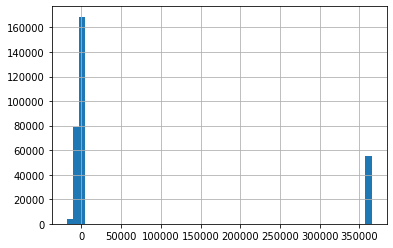

In [11]:
df.DAYS_EMPLOYED.hist(bins = 50);

In [12]:
df.query("DAYS_EMPLOYED >= 100000").DAYS_EMPLOYED.shape

(55374,)

These high values for `DAYS_EMPLOYED` appear to be **associated with clients that are "Pensioners" or Unemployed and do not list an employment orgainization** (`ORGANIZATION_TYPE`).
This is shown in the code below by querying the record indexes for high values of `DAYS_EMPLOYED` and the record indexes with `NAME_INCOME_TYPE`s of "Unemployed" and "Pensioner".
This indexes of these two queries are the same.

In [13]:
# get the instances with NAME_INCOME_TYPE either Pensioner or Unemployed
filtered_index = df.query('NAME_INCOME_TYPE == "Pensioner" | NAME_INCOME_TYPE == "Unemployed"')
# filter to NAs for ORGANIZATION_TYPE and get the index of the array
filtered_index = df[df.ORGANIZATION_TYPE.isna()].index
# get the indexes of the high values
high_val_index = df.query("DAYS_EMPLOYED >= 100000").index
# assert that indexes are the same
if np.equal(filtered_index, high_val_index).all():
    print('Index of queried values are the same.')
else:
    print('Indexes of queried values are different.')

Index of queried values are the same.


**Possible Solution**

A possible solution to this data quality issue would be to add a `None` level to `ORGANIZATION_TYPE` and only use `DAYS_EMPLOYED` as an interaction with `ORGANIZATION_TYPE`.

### Data Cleaning Script

All the cleaning discussed in the sections above are implemented in `cleaning.py`.
This script contains a function (`read_clean_data`) to apply the cleaning steps and return the cleaned dataset for work.

**Details**  
* Cleaning
  * Read csv with Pandas (setting correct data types)
  * Drop columns that will not be used
  * Recode NA values that are not listed as np.nan
  * Formattings
  * Encode categorical variables
* Returns
  * DataFrame with cleaned data

**Sample Output**

In [14]:
#data = read_clean_data()
data.head(2)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,CREDIT_INCOME_RATIO,ANNUITY_INCOME_RATIO,PERCENT_EMPLOYED_TO_AGE,LOAN_COUNT,CREDIT_ACTIVE,CREDIT_DAY_OVERDUE,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,2.007889,0.121978,0.067329,8.0,2.0,0.0,481988.565,245781.0,31988.565,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,4.790750,0.132217,0.070862,4.0,1.0,0.0,810000.000,0.0,810000.000,0.0


## 2.4 Simple Data Statistics (Q2C) <a class="anchor" id="Stats"></a>

After cleaning the data with corrections of datatypes, strings that are labeled as object datatypes, and integer counts re-labeled as a category, we had a good base to analyze. The merging of data from the bureau focused our data contents potential to answer our primary objective. The elimination of outliers resulted in a slightly better balancing of the majority of the content. The cleaned and focused content produced some interesting simple statistical results when analyzed with a dataset exploratory tool. The overview of the dataset is the following:

- Features
    - Number of variables	82
    - Number of observations	307511
    - Missing cells	0 (0.0%)
    - Duplicate rows	0 (0.0%)
    - Total size in memory	142.8 MiB
    - Average record size in memory	487.1 B
- Variables types
    - BOOL	35
    - CAT	25
    - NUM	22
 
With this cleaning, we still have some features that have content that could lessen the accuracy of our model.

- AMT_INCOME_TOTAL is highly skewed (γ1 = 391.5596541)	-> Skewed
- DAYS_EMPLOYED has 55376 (18.0%) zeros -> Zeros
- OWN_CAR_AGE has 205063 (66.7%) zeros	-> Zeros
- ORGANIZATION_TYPE has a high cardinality: 58 distinct values	-> Warning
- EXT_SOURCE_1 has 173378 (56.4%) zeros	-> Zeros
- EXT_SOURCE_3 has 60965 (19.8%) zeros	-> Zeros
- OBS_30_CNT_SOCIAL_CIRCLE has 164931 (53.6%) zeros	-> Zeros
- DEF_30_CNT_SOCIAL_CIRCLE has 272345 (88.6%) zeros	-> Zeros
- OBS_60_CNT_SOCIAL_CIRCLE has 165687 (53.9%) zeros	-> Zeros
- DEF_60_CNT_SOCIAL_CIRCLE has 281742 (91.6%) zeros	-> Zeros
- DAYS_LAST_PHONE_CHANGE has 37672 (12.3%) zeros	-> Zeros
- PERCENT_EMPLOYED_TO_AGE has 55376 (18.0%) zeros	-> Zeros


Since Home Credit is an international non-bank financial institution that operates in 10 countries and focuses on lending to people with little or no credit history, it isn't possible to transfer our analysis across the world's population. This institution has served 11 million customers, but with the new presence in China and the United States, this dataset scope should expand to these populations.

The data set that we presently have access to gives us a clear insight into the majority of the 11 million customers, who are based in the Czechia, and the Commonwealth of Independent States Countries, especially Russia. The majority of these populations have very little income to allow for cash loan repayment.
    





<img src="./income_amount.png" style="width:450px;height:650px"/>



In [15]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from IPython.display import IFrame


### Below is the full profiling report which you can dive into to see additional characteristics of our dataset.




In [16]:
# Generate the pandas_profile report (Commented out running profilereport after run once due to long runtime)
# profile = ProfileReport(data, minimal=True)
#IFrame("./profiling_report.html", width=980, height=400)

### 2.4.1 Distributions (Q2D) <a class="anchor" id="Distributions"></a>

This part of the exploration focused on the use of box plots and histograms for visualing continuous variables and bar charts for visualizing categorical variables. These graphical formats permit the easy identification of skewedness and help us identify outliers. 

Variables we expect to be important were selected for univariate visualization, such as `AMT_INCOME_TOTAL` and `AMT_ANNUITY`. The histogram shows the features of the main distribution, while the behavior of the tails and extreme values are shown in the boxplots. The distribution of incomes is extremely long-tailed and right-skewed, as can be expected with most any income distribution. 

Boxplots indicate a large number of outliers in both the `AMT_TOTAL_INCOME` and `AMT_ANNUITY` feature and one extreme outlier that will require closer exmaination. A comparison of each distribution in its raw and transformed form is displayed below.

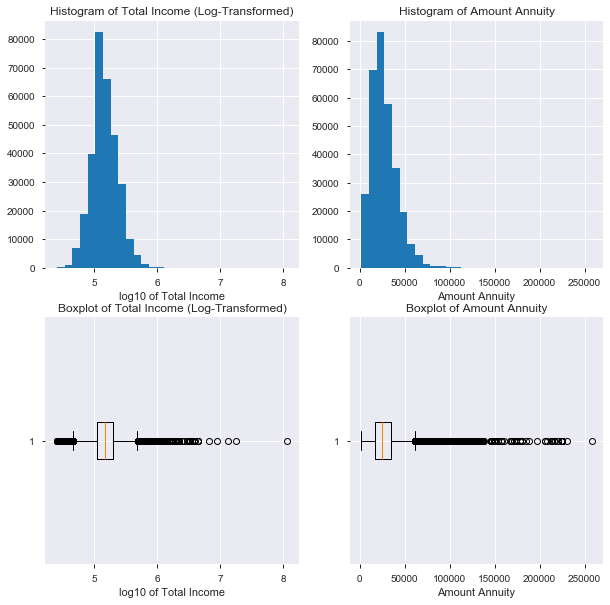

In [17]:
fig, axes = plt.subplots(2,2, figsize=(10, 10))
# histogram of total income
axes[0,0].hist(np.log10(data.AMT_INCOME_TOTAL), bins = 30)
axes[0,0].set_xlabel('log10 of Total Income')
axes[0,0].set_title('Histogram of Total Income (Log-Transformed)');
# boxplot of total income
axes[1,0].boxplot(np.log10(data.AMT_INCOME_TOTAL), vert = False)
axes[1,0].set_xlabel('log10 of Total Income')
axes[1,0].set_title('Boxplot of Total Income (Log-Transformed)');

# histogram of annuity
axes[0,1].hist((data.AMT_ANNUITY), bins = 30)
axes[0,1].set_xlabel('Amount Annuity')
axes[0,1].set_title('Histogram of Amount Annuity');
# boxplot of annuity
axes[1,1].boxplot((data.AMT_ANNUITY), vert = False)
axes[1,1].set_xlabel('Amount Annuity')
axes[1,1].set_title('Boxplot of Amount Annuity');

**Financial Features**

We expect that financial features, such as an applicant's reported annual income (`AMT_INCOME_TOTAL`), will be important to the analysis as leading indicators of the applicant's ability to successfully repay a loan. From a business perspective, smaller incomes customers will necessitate more automated decisions due to the small individual profit potential that each loan represents. Large incomes, however, may receive special treatment due not only to their outlier status, but to the larger profit margins Home Credit can expect as their loans are repaid. An analysis of income distributions will assist us in determining an appropriate categorization of loan applicants to optimize the ratio of time spent to profit potential based on income and loan size.

**AMT_INCOME_TOTAL**

For ease of visualization, AMT_INCOME_TOTAL was transformed with log base-10.
This is due to influence from some very large observations on histogram binning.
As shown in the pair of plots for AMT_INCOME_TOTAL, most of the values are clustered just above 100,000 (5).
The main section of the log transformed distribution appears to relatively close to a normal (the distribution is right-skewed on the original scale).
Several extreme values are shown in the box plot.
The most extreme value is approximately 1000 times larger than the median and mean of the distribution.

**AMT_ANNUITY**

Like AMT_INCOME_TOTAL, AMT_ANNUITY has a right skewed distribution.
However, this feature could be plotted on the original scale because the scale is not as large as AMT_INCOME_TOTAL.
The histogram shows that most of the values are between 0 and 50,000.
The boxplot shows that there are some exteme values outside the main distribution.
The largest extreme value is approximately 10 times the median value.

For the finacial features we expect that some kind of transformation may be necessary to reduce the influence of the extreme values.
We may also consider removing very large outliers as they may be treated differently by the bank.
For instance, clients with very large incomes may be work personally with a bank representative rather than interacting with an automated system.

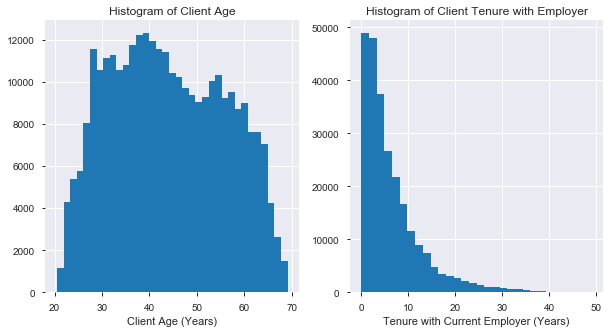

In [18]:
fig, axes = plt.subplots(1,2, figsize=(10, 5))
# histogram of age
axes[0].hist(data.DAYS_BIRTH / 365, bins = 35)
axes[0].set_xlabel('Client Age (Years)')
axes[0].set_title('Histogram of Client Age');
# histogram of employment tenure
# filter out the clients that do not appear to be employed
employed = data.query('NAME_INCOME_TYPE != "Pensioner" & NAME_INCOME_TYPE != "Unemployed"')
axes[1].hist((employed.DAYS_EMPLOYED / 365), bins = 30)
axes[1].set_xlabel('Tenure with Current Employer (Years)')
axes[1].set_title('Histogram of Client Tenure with Employer');

**DAYS_BIRTH**

We expect that client age may be an important factor in determining a client's ability to pay back a loan.
Higher ages may represent more time to accumulate wealth and more experience dealing with financial matter.
The ages are transformed into years (the original scale is days) because years is a more interpretable unit than days when the values are large.
Client ages appear to be almost uniform.
The majoity of clients are around 25 to 65 years of age.

**DAYS_EMPLOYED**

We expect that tenture may be useful in predicting loan repayment ability.
In some cases, individuals that have stayed with an employer for a long period of time are compensated well.
Since values are large, the tenure with most recent employer are plotted in years rather than days.
Tenure with current employer is very right-skewed.
There is a steep decrease in clients tenure from 0 years to approximately 15 years.
There appears to be an inflection point around 15 years of tenure and the rate of decrease of the distribution tramatically slows.
Clients that were listed as pensioners or unemployed were filtered out of this distribution.

In [19]:
axes = count_values_table(data.NAME_HOUSING_TYPE).plot.bar()
axes.set_xlabel('Housing Type')
axes.set_ylabel('Number of Clients')
axes.set_title('Number of Clients By Type of Housing');

TypeError: '<' not supported between instances of 'str' and 'int'

**NAME_HOUSING_TYPE**

Almost all clients reported living in a house or apartment.
Only a relatively small portion of clients reported in other types of living situations.
The skewness of this categorical variable could be an issue because of the bias toward a single response.

In [ ]:
axes = count_values_table(data.OCCUPATION_TYPE).plot.bar();
axes.set_xlabel('Name of Occupation Type')
axes.set_ylabel('Number of Clients')
axes.set_title('Number of Clients By Occupation Type');

**OCCUPATION_TYPE**

We expect that the client's type of occupation may affect a client's ability to repay loans. 
The bar chart shows the counts of occupation type reported by clients. 
We see that many occupation types were reported. 
This feature has a high cardinality with low counts in about two thirds in of the categories. 
Oddly, a large number did not report an occuption type (third highest count); these are listed as "Unknown." 
It is possible that too many clients reported no type of occupation for this feature to be useful.

## 2.4.2 Correlations (Q2E) <a class="anchor" id="Correlations"></a>
To begin the process of exploring the relationships between continuous variables, we rely on two strategies:
- Scatterplot Matrices
- Correlation Plots
Scatterplot matrices are intended to help visually identify relationships, and evidence of multicollinearity, between predictor variables. Correlation Plots, or heatmaps annotated with the Pearson's Correlation Coefficient of the two predictor variables, will quantify the relationship between the predictors in question. Together, these visualizations provide an initial form of feature selection because relationships between variables will be limited and the relationships to the predictor variable will be maximized.

A limitation of this strategy is that scatterplot matrices can only visualize a limited number of variables at once, but a deeper mathmatical exploration in the form of Component Analysis will be performed as well.

To analyze the distribution of the target variable across the categorical variables, we rely primarily on:
- Stacked Bar Charts
Stacked bar charts are an ideal way of analyzing the distribution of the target variable across the continuous variables.

Additionally, we will view the relationship between the continuous variables and the target variable scatterplot matrices colored by group membership, where the groups are the target variable. This visualization method will help identify variables that provide the greatest discrimination between the two levels of TARGET.

**Scatterplot Matrices of Coninuous Variables**
- To begin, we will user scatterplot matrices to identify relationships between groups of variables, without the TARGET variable.

In [ ]:
import matplotlib.pyplot as plt
#from mlxtend.plotting import scatterplotmatrix

cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE','AMT_ANNUITY', 'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT',
       'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE']
g = sns.pairplot(data[cols])
#g.map_lower(sns.kdeplot, cmap="Blues_d") # use joint kde on the lower triangle
#g.map_upper(plt.scatter) # scatter on the upper
#g.map_diag(sns.kdeplot, lw=3, legend = False) # kde histogram on the diagonal
g.fig.suptitle('Relationships: AMT_INCOME_TOTAL, AMT_CREDIT, AMT_GOODS_PRICE, AMT_ANNUITY', y= 1.08)
plt.tight_layout()
plt.show()

## Outliers Identified
The scatterplot matrix revealed the impact of significant outliers in the AMT_INCOME_TOTAL feature. The most significant outlier is more than ten times that of the next greatest income. 
## Other Significant Findings
A collinear relationship between AMT_GOODS_PRICE and AMT_CREDIT also exists, representing the fact that cash credit is awarded on the basis of the value of the goods purchased. Also, the AMT_CREDIT, AMT_ANNUITY, and AMT_GOODS_PRICE variables appear to have almost identical relationships. The AMT_GOODS_PRICE feature will be considered for elimination.

## Correlation Plot

A heatmap is chosen to visualize the correlation matrix of the large scale continuous variables because of the ease of determining multicollinearity among the predictor variables. The same variables used in the scatterplot matrix are chosen to quantify the degree of multicollinearity that exists among them.

In [ ]:
# creating correlation matrix
corr = data[cols].corr()
#generate mask for upper tirangle
mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up matplotlib figure
f, ax = plt.subplots(figsize=(11,9))

# Draw heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap = 'coolwarm', center = 0.5, 
            linewidth = .5, cbar_kws={'shrink': .5},
           square = True, annot = True)


** Significant Findings **

The correlation plot reveals a 99% correlation between the AMT_GOODS_CREDIT and AMT_CREDIT features. AMT_GOODS_CREDIT will be removed from consideration because it is collinear with AMT_ANNUITY as well as AMT_CREDIT and will cause interference as we try to determine feature importance.


## 2.4.3 Relationships to the Target Variable (Q2F) 

We will move on to analyzing the distribution of features across the two levels of the variable `TARGET`. 

We begin by analyzing the `AMT_INCOME_TOTAL` feature due to its expected importance in discriminating between the two levels of the target variable.

To observe the behavior of applicants based on income, we will bin them into quantiles using the AMT_INCOME_TOTAL feature and plot them against TARGET.

In [ ]:
#create quantiles
CAT_INCOME = pd.qcut(data['AMT_INCOME_TOTAL'], q = 4)
print(CAT_INCOME.head())

We chose to visualize the distribution of loan defaults across income quantiles with a heatmap because it will quickly allow us to assess the distribution of the quantiles and identify the quantiles where the majority of defaults exist in. This knowledge will help determine whether removing the high income outliers from consideration will be detrimental to the model's ability to discriminate between the two levels of the `TARGET` variable.

In [ ]:
default_income = list(zip(data.TARGET.astype(bool), CAT_INCOME))
def_by_inc = pd.DataFrame(default_income, columns = ['TARGET', 'INCOME_CAT'])
def_by_inc = pd.crosstab(index = def_by_inc.TARGET, columns = def_by_inc.INCOME_CAT).apply(lambda x: (x/x.sum())*100, axis = 1)
def_by_inc.head()

p = sns.heatmap(def_by_inc, vmin = 15, vmax = 40, annot = True, linewidths = .5, cmap = 'coolwarm',
           annot_kws={'fontsize': 10,
                     'verticalalignment':'center'})
p.set(title = 'Defaults by Income Category',
       ylabel = 'Loan Status - True = Default',
       xlabel = 'Income Ranges')

**Signficant Findings**

A heatmap of loan defaults by income brackets indicates that a majority of loan defaults occur from the lower end of the income spectrum, within the range of 25,649 and 112,500. This observation points to a modest impact on a model where the highest income earners are removed from consideration. Home Credit would benefit more from removing the high-income outliers than the low-income outliers due to distribution of applicants indicated by the heatmap. 75% of Home Credit's applicants report having incomes less than 202,500, so the default behavior of large-income applicants should be modeled seperately.


**Analyzing Ratios**

Due to the scale difference between the income variables and the engineered ratios, we chose to visualize our engineered features seperately from the income features. The inclusion of the `TARGET` variable permits the observation of seperation between loans that defaulted and those who did not. The scatterplot matrix below visualizes the relationship between `CREDIT_ACTIVE`, `CREDIT_INCOME_RATIO`, `ANNUITY_INCOME_RATIO`, and `PERCENT_EMPLOYED_TO_AGE` and the `TARGET`. Orange represents defaulted loans.

In [ ]:
#changing the TARGET variable to categorical for easier visualization
data['TARGET'] = data.TARGET.astype('category')
import seaborn as sns
sns.set(style="ticks")
engFeatures = ['CREDIT_ACTIVE','CREDIT_INCOME_RATIO','ANNUITY_INCOME_RATIO','PERCENT_EMPLOYED_TO_AGE', 'TARGET']

sns.pairplot(data[engFeatures], hue = 'TARGET')
plt.show()

#removing warnings
import warnings
warnings.simplefilter('ignore')

The kernel density plots reveal that applicants with fewer active accounts, total accounts, and less available credit tend to have a higher risk of defaulting on loans, as expected. The outlier default whose income was in excess of 117 million dollars is also clearly evident in most of the plots and would likely have a strong impact on a final model. This provides more evidence for the removal of the millionaire default outlier.

**Analyzing Engineered Features**

We also engineered four features from the `bureau.csv` dataset, which consists of credit bureau data on available accounts, both active and inactive. Due to time constraints and the over 1.7 million records contained within the `bureau.csv`, we chose to limit the focus of the analysis to only active accounts, because current behavior is more relevant than past behavior. The features we visualized were gathered for all active accounts, then grouped by applicant id, `SK_ID_CURR`, and the sums were calculated. Any applicant who did not have an active account is reprented by a value of zero in each of these features.

As with the previous visualization, orange denotes applicants who defaulted on their loans.

In [ ]:
creditSums = ['AMT_CREDIT_SUM_OVERDUE', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM', 'TARGET']
sns.pairplot(data[creditSums], hue = 'TARGET')
plt.show()

**Significant Findings**

When analyzing the distribution of the TARGET variable across the continuous credit features, the impact of the high income outliers is even more pronounced, making it impossible to view the features that will help identify features critical to predicting defaults.

The kernel density plots clearly indicate that the vast majority of defaults are occuring among applicants who have no reported active accounts, which is expected. We can observe signficant clustering around zero values along both axes due to the fact that Home Credit's customer base has little to no credit history. We do not expect that these features will rank among the most important features, but may prove helpful as a part of the model.

## Examining Defaults by Property Ownership
We hypothesized that property ownership has a significant impact on the probability that an applicant will default on their loans. We identified two common types of property, homes and apartments and vehicles. These were chosen due to their assumed likelihood of indicating wealth regardless of the amount of reported income an applicant has. 

** Defaults by Home Ownership and Type of Loan**

Below are two bar graphs that indicate patterns among the given data. A log transformation was used on the crosstabulated counts in order to scale the data down.

In [ ]:
defaultsHouse_loan = pd.crosstab([data['NAME_HOUSING_TYPE'], data['NAME_CONTRACT_TYPE']],
                            data.TARGET.astype(bool))
# log transformed version for rescaling purposes
l_defaults = np.log10(defaultsHouse_loan)

# plot raw crosstabulation
defaultsHouse_loan.plot(kind = 'barh')
plt.suptitle("Defaults by Housing and Loan Type ")
plt.xlabel('Default Count')
plt.ylabel('Housing and Loan Types');

#plot log base 10 transformed data
l_defaults.plot(kind = 'barh')
plt.suptitle("Log(Defaults by Housing and Loan Type)")
plt.xlabel('Default Count')
plt.ylabel('Housing and Loan Types');

**Significant Findings**

The barplots reveal that a vast majority of the loans in the dataset are cash loans offered to people who own their house or apartment. There is evidence to suggest that default rates appear highest among people who live with their parents and recieve cash loans. 

The evidence also indicates that people who live in Co-op and Office apartments and have revolving loans may default at lower rates than people who own their homes.

**Analyzing Defaults by Income Type and Car Ownership**

We will also examine default behavior among people who own their cars. A log transformation was performed in this case as well.

In [ ]:
defaultsActiveAcc = pd.crosstab([data.NAME_INCOME_TYPE, data.FLAG_OWN_CAR], data.TARGET.astype(bool))

# log transformed version for rescaling purposes
l_defaults = np.log10(defaultsActiveAcc)

# plot raw crosstabulation
defaultsActiveAcc.plot(kind = 'barh')
plt.suptitle("Defaults by Income and Car Ownership")
plt.xlabel('Default Count')
plt.ylabel('Income and Car Ownership Status');

#plot log base 10 transformed data
l_defaults.plot(kind = 'barh')
plt.suptitle("Log(Defaults by Income and Car Ownership)")
plt.xlabel('Default Count')
plt.ylabel('Income and Car Ownership Status');

**Significant Findings**

There is evidence to suggest that women on maternity leave, students, and businessmen have different loan default behavior, as these income categories have no recorded defaults regardless of car ownership. The bar graphs provide evidence that car owners appear to default less frequently than people who do not own cars.  

### Distribution of the Target Variable Across Binary Indicator Variables

The given dataset contains a large number of binary indicator variables for the presence of 20 documents, vehicle ownership, real estate ownership, mobile phone ownership, and methods of contact, such as the presence of an email address and an employer phone number. Given the absence of credit history, we chose to investigate the distribution of defaults across these indicator variables to find patterns.

In [ ]:
#print(data.columns)
flags = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
       'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
       'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21', 'TARGET']
# modify display options to show all columns
from IPython.display import display
pd.options.display.max_columns = None
display(data[flags].groupby(data.TARGET).describe())

## 2.5 Feature Engineering (Q2G) <a class="anchor" id="Featurecreation"></a>

#### Engineered Loan Application Features

The following features were engineered from the loan application features (from `application_train.csv`).

| Engineered Feature           | Description | Type | Units | Formula |
|------------------------------|-------------|------|-------|---------|
| CREDIT_INCOME_RATIO   | The percentage credit relative to client's income | Numeric | N/A | `AMT_CREDIT` / `AMT_INCOME_TOTAL` |
| ANNUITY_INCOME_RATIO  | The percentage annunity relative to client's income | Numeric | N/A | `AMT_ANNUITY` / `AMT_INCOME_TOTAL` | 
| PERCENT_EMPLOYED_TO_AGE      | The fraction of client's days employed. | Numeric | N/A | `DAYS_EMPLOYED` / `DAYS_BIRTH` |

The following features were engineered from the bureau features (from `bureau.csv`).

| Engineered Feature           | Description | Type | Units | Formula |
|------------------------------|-------------|------|-------|---------|
| LOAN_COUNT      | The total number of accounts, active and closed. | Numeric | N/A | length of `CREDIT_ACTIVE`, grouped by loan ID |
| CREDIT_ACTIVE   | A count of active credit accounts by loan ID | Numeric | N/A | `len(bureau['CREDIT_ACTIVE'] == 'Active')` |
| CREDIT_DAY_OVERDUE   | A count of days overdue for active credit accounts by loan ID | Numeric | N/A | sum of `CREDIT_DAY_OVERDUE` for `CREDIT_ACTIVE == Active`, grouped by loan ID  |
| AMT_CREDIT_SUM   | Total credit available from active accounts | Numeric | N/A | sum of `AMT_CREDIT_SUM` for `CREDIT_ACTIVE == Active`, grouped by loan ID  |
| AMT_CREDIT_SUM_DEBT   | Total debt of active accounts | Numeric | N/A | sum of `AMT_CREDIT_SUM_DEBT` for `CREDIT_ACTIVE == Active`, grouped by loan ID  |
| AMT_CREDIT_SUM_LIMIT  | Overall credit limit of active accounts | Numeric | N/A | sum of `AMT_CREDIT_SUM_LIMIT` for `CREDIT_ACTIVE == Active`, grouped by loan ID  |
| AMT_CREDIT_SUM_OVERDUE  | Total amount overdue | Numeric | N/A | sum of `AMT_CREDIT_SUM_OVERDUE` for `CREDIT_ACTIVE == Active`, grouped by loan ID  |

## 2.6 Outlier Removal <a class="anchor" id="OutlierRemoval"></a>
#### Feature Selection for Outlier Removal
Outlier removal was performed following feature analysis, imputation, and engineering to allow for a complete assessment of the raw data. The outlier
removal process required to first identify the order of feature importance. To perform this, we applied a Random Forest and used the resutling Gini 
coefficients to identify importance. Categorical features were one-hot encoded prior to constructing a random forest. While there may be some potential minimization of categorical importance from this approach (through introducing more parameters and slightly dilluting the correlation), any residual collinearity following variable elimination would be likewise minimized by further separating significance of categorical variables in preference to other collinear, continuous and nominally scaled integer features.

Using the random forest output, the top 15 features were identified. We decided to analyze 15 features for outlier removal due to the exponentially decaying significance of subsequent features to the target and the negative impact of removing too many observations. We performed analysis on these 15 features using histograms to assess dispersion and measured skewness on all transformed features to identify the most practical transformations (root, logarithmic, squared) required for normalization. Skewness around +/-1 was considered extreme, between +/-0.5 as moderate, and 0 as non-existent. Of these 15 features analyzed, eight features had outliers removed; highly imputed features and those with 

#### Three Standard Deviations
Once normalized, features were then stripped of outliers. The outlier treatment applied uses z-tests to assess statistical dispersion of the data. Values beyond +/- three standard deviations are dropped from the model. This approach was selected because three standard deviations covers roughly 99.78% of all data, eliminating only extreme outliers. Three standard deviations is also within a reliable range for hypothesis testing. After dropping outlying observations from the data, we then back-transformed it to allow prior knowledge in the data to remain for its use in classification modeling.

#### Quantifying Outlier Removal Impact
Prior to outlier removal, the dataset had 307,511 observations. Following removal, the volume decreased by 21.399 percent to a count of 241,744 observations.

In [ ]:
from scipy import stats

# transform data
data['DAYS_REGISTRATION'] = (data['DAYS_REGISTRATION'])**(1/2)
data['ANNUITY_INCOME_RATIO'] = (data['ANNUITY_INCOME_RATIO'])**(1/3)
data['CREDIT_INCOME_RATIO'] = (data['CREDIT_INCOME_RATIO'])**(1/7)
data['AMT_ANNUITY'] = (data['AMT_ANNUITY'])**(1/4)
data['DAYS_EMPLOYED'] = (data['DAYS_EMPLOYED'])**(1/5)
data['PERCENT_EMPLOYED_TO_AGE'] = (data['PERCENT_EMPLOYED_TO_AGE'])**(1/2)
data['AMT_GOODS_PRICE'] = (data['AMT_GOODS_PRICE'])**(1/6)
data['AMT_INCOME_TOTAL'] = (data['AMT_INCOME_TOTAL'])**(1/50)

# index columns selected for outlier removal
varTransforms = ['DAYS_REGISTRATION', 'ANNUITY_INCOME_RATIO','CREDIT_INCOME_RATIO','AMT_ANNUITY','DAYS_EMPLOYED'
                 ,'PERCENT_EMPLOYED_TO_AGE','AMT_GOODS_PRICE','AMT_INCOME_TOTAL']

# split datasets based on columns selected
num_train = data[varTransforms]
cat_train = data.drop(varTransforms, axis=1)

# perform two-tailed z-test to index only observations within 3 standard devations of the mean
indx = np.abs(stats.zscore(num_train) < 3).all(axis=1)
train_cleaned_numeric = pd.concat([num_train.loc[indx], cat_train.loc[indx]], axis=1)

# back-transform data for prior knowledge
data['DAYS_REGISTRATION'] = (data['DAYS_REGISTRATION'])**(2)
data['ANNUITY_INCOME_RATIO'] = (data['ANNUITY_INCOME_RATIO'])**(3)
data['CREDIT_INCOME_RATIO'] = (data['CREDIT_INCOME_RATIO'])**(7)
data['AMT_ANNUITY'] = (data['AMT_ANNUITY'])**(4)
data['DAYS_EMPLOYED'] = (data['DAYS_EMPLOYED'])**(5)
data['PERCENT_EMPLOYED_TO_AGE'] = (data['PERCENT_EMPLOYED_TO_AGE'])**(2)
data['AMT_GOODS_PRICE'] = (data['AMT_GOODS_PRICE'])**(6)
data['AMT_INCOME_TOTAL'] = (data['AMT_INCOME_TOTAL'])**(50)
data = data[data.AMT_INCOME_TOTAL < 400000]

# 3. Stage  Three - Additional Work Accompanying Exploratory Data Analysis <a class="anchor" id="AdditionalWork"></a>

## 3.1 Random Forest for Feature Importance using Gini Index<a class="anchor" id="randomforestgini"></a>
The approach used for feature importance identification is an ensemble learning approach called random forest, which makes a modal decision based on randomized decision tree output. The random forest provided Gini coefficient measures for feature importance. The table below provides a list of the output considered prior to outlier elimination.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from pandas import DataFrame
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# encode categorical data
new_df = pd.get_dummies(data)

# instantiate the random forest classification model
forest = RandomForestClassifier()

train = new_df
y_train = train['TARGET']
X_train = train.loc[:, train.columns != 'TARGET']

# fit the random forest model
forest.fit(X_train, y_train)

feature_importances = pd.DataFrame(forest.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=False)

pd.set_option('display.max_rows', None)
feature_importances.drop(['SK_ID_CURR','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']).head(15)

## 3.2 Principal Components Analysis<a class="anchor" id="princomp"></a>
Following all encoding, imputations, and transformations were performed, we performed a principal components analysis in which we assessed for six potential components we could use to reduce the dimensionality of the data. Roughly 87.49 percent of total variance in the data is explained by the first principal component. The second principal component covers roughly 7.28 percent of the remaining variance, followed by 4.18 percent by component three.

In [ ]:
import pandas as pd
import prince
import pprint
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(new_df)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1','principal component 2','principal component 3'
                          ,'principal component 4','principal component 5','principal component 6'])

In [ ]:
princ_comp = pd.DataFrame(pca.explained_variance_ratio_)
pca_ev = princ_comp.rename(columns={princ_comp.columns[0]: 'PCA Explained Variance'})
pca_ev

In [ ]:
principalDf.head()

In [ ]:
finalDf = pd.concat([principalDf, df[['SK_ID_CURR']]], axis = 1)
final_df_full = pd.concat([principalDf, data], axis = 1)

In [ ]:
final_df_full.head()